<b>Computation learning objectives:</b>
- Recall basic plotting mechanics and apply them to DataFrames
- Understand how to use a `c` axis with a DataFrame column

<b>Geoscience learning objectives:</b>
- Identify appropriate visualizations for time series and/or cross-plotted data
- Recognize situations in which additional data (e.g. colored points) might be useful for a visualization

<b>Previous skills leveraged:</b>
- Loading and slicing a `pandas` DataFrame
- Creating `plt`, `fig`, and `ax` objects and using them to create data visualizations


<b>Real-world context:</b>
- Tabular environmental and geoscientific data is often plotted as either a time series (with time on the x-axis, often as a line plot) or as a cross-plot (one variable plotted against another, often as points on a scatterplot)

## Previous module review: `pandas` DataFrames

Using the previous module's code as a reference, <b>load</i> the `williamsburg_meteo.csv` file as a DataFrame called "`weather_data`". Below, I've started by importing the package you'll use here:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
weather_data = pd.read_csv('../module_02/williamsburg_meteo.csv')
# Your code here

# Plotting with `pandas`

Like in Excel, data organization is only half the fun - we want to make plots too! Recall that you can extract data from a DataFrame by calling up a column:

In [4]:
weather_data['PRCP']

0      0.03
1      0.74
2      1.86
3      0.00
4      0.01
       ... 
360    0.00
361    0.00
362    0.00
363    0.00
364    0.55
Name: PRCP, Length: 365, dtype: float64

And, just like in the earlier plotting module, we can then save two different columns as two different varialbes to plot one column in a DataFrame against another:

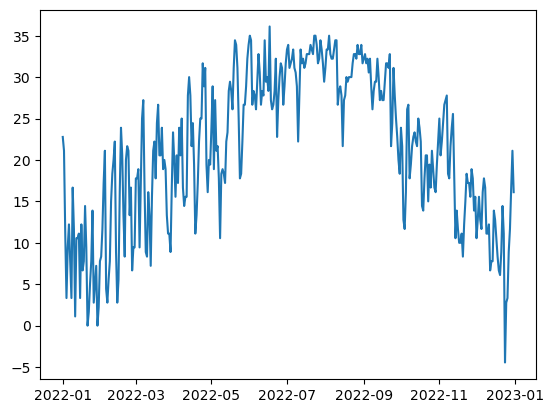

In [20]:
# First, I'll perform this "cleaning" step like last time
weather_data['datetime'] = pd.to_datetime(weather_data['DATE']) # the pd.to_datetime() just reads the dates as a specific type of data that plots well for time seriesdate = weather_data['TMAX']

# And then I will save the variable
date = weather_data['datetime']
precip = weather_data['PRCP']

# So I can plot temperature against date
high_tempc = (weather_data['TMAX'] - 32) * (5/9)# The column representing the maximum temperature

plt.plot(date, high_tempc)

<i>Is this a publication-worthy plot? Why or why not?</i>

# Mini-assignment

Remembering all your `matplotlib` lessons from last week, make <b>two separate plots</b> for the <b>highest</b> daily temperature and the <b>lowest</b> daily temperature. 

Text(0, 0.5, 'Temperature (°C)')

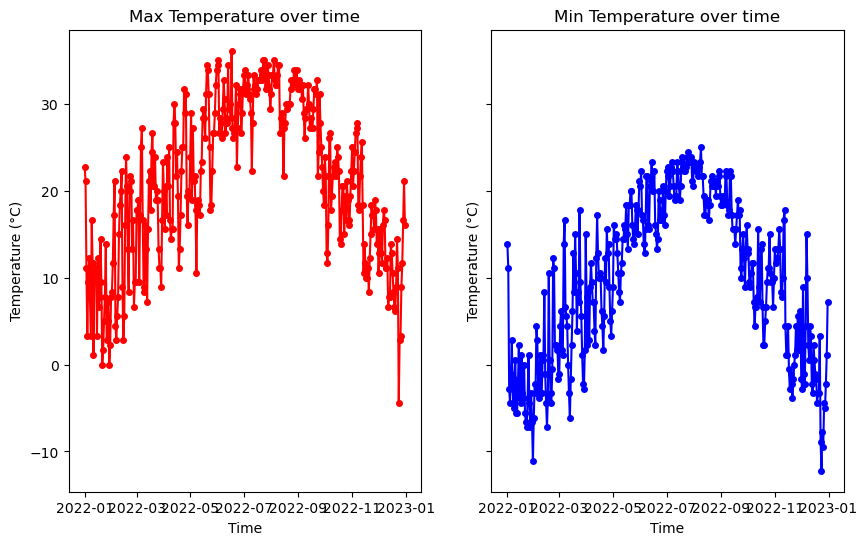

In [16]:
low_tempc = (weather_data['TMIN'] - 32) * (5/9)

#Create a fig and ax object
fig, ax = plt.subplots(1,2, figsize=(10,6), sharey=True)

# Now you have an ax object that has two objects in it
# ax[0] is the zeroeth (first) element, ax[1] is the first element, etc. 

# Plot something on the ax object
ax[0].plot(date, high_tempc,  color='red', marker='o', linestyle='-', markersize=4)

# Plot something on the ax object
ax[1].plot(date, low_tempc,  color='blue', marker='o', linestyle='-', markersize=4)

# Set the title of the axis
ax[0].set_title('Max Temperature over time')
ax[1].set_title('Min Temperature over time')

# Label the x-axes
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')

# Label the y-axis
ax[0].set_ylabel('Temperature (°C)')
ax[1].set_ylabel('Temperature (°C)')

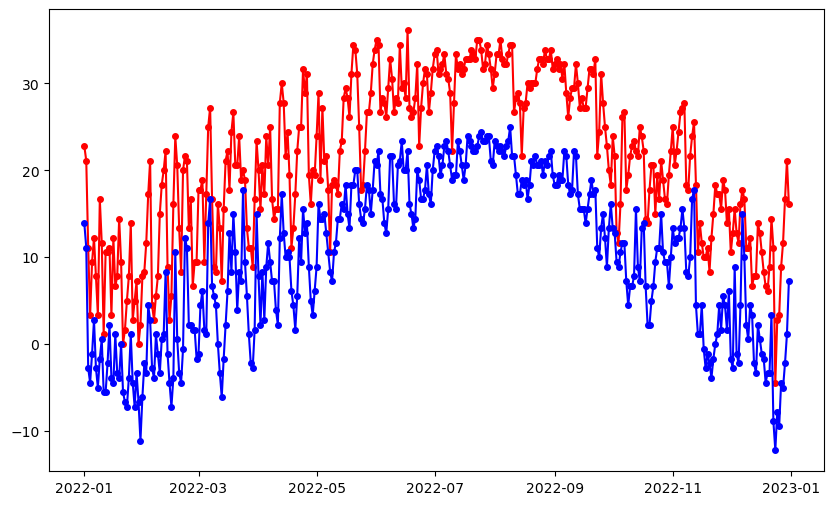

In [17]:
# Note that they can be displayed on the same plot
# It just depends on what you want to show

# Create a fig and ax object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot something on the ax object
ax.plot(date, high_tempc, color='red', marker='o', linestyle='-', markersize=4)
ax.plot(date, low_tempc, color='blue', marker='o', linestyle='-', markersize=4)

## Using `pandas`' built-in plotting functions

`pandas` actually has its own [plotting functions](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) that use a slightly different syntax for quick visualization of data.

You can see below that the syntax is `[name of the data frame].plot.[type of plot]` for something like a [scatterplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html).

<Axes: title={'center': 'Example Plot'}, xlabel='datetime', ylabel='TMAX'>

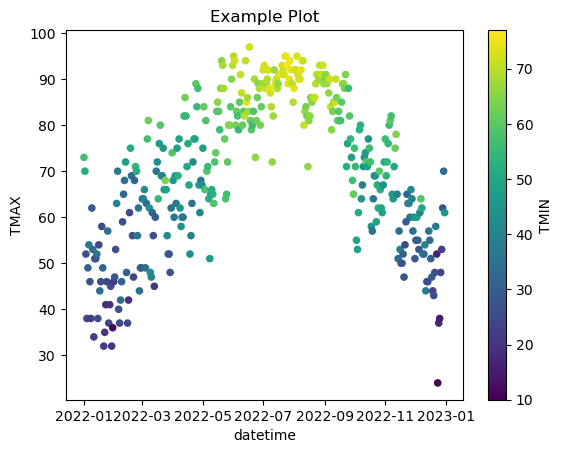

In [18]:
# Use the built-in plot() function to create a line plot
weather_data.plot.scatter(x='datetime', y='TMAX', c='TMIN', title='Example Plot', marker='o', cmap='viridis')

You can specify the `ax` object to plot on for maximum customization of axes!

Text(0.5, 0, 'Date')

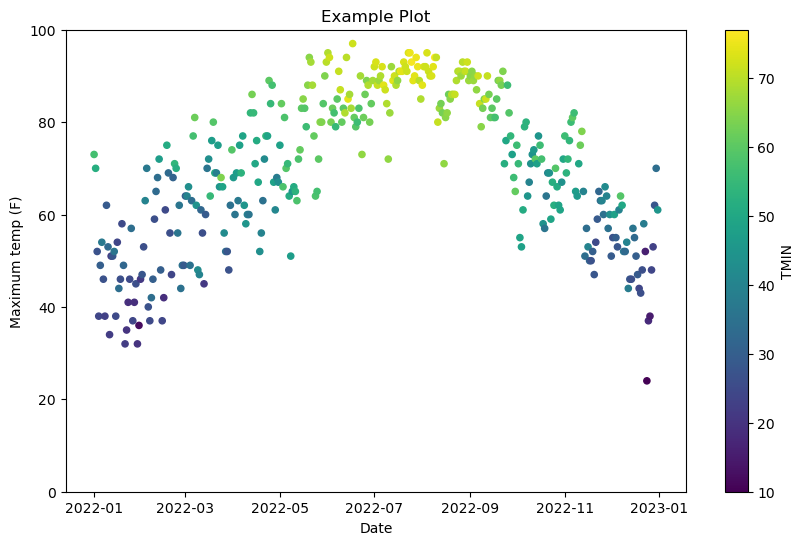

In [19]:
# Create a fig and ax object
fig, ax = plt.subplots(figsize=(10, 6))

# Use the built-in plot() function to create a line plot
weather_data.plot.scatter(x='datetime', y='TMAX', c='TMIN', title='Example Plot', marker='o', cmap='viridis', ax=ax)

ax.set_ylim(0, 100)

ax.set_ylabel('Maximum temp (F)')

ax.set_xlabel('Date')

## Mini-assignment

Bringing all your knowledge together, create a visual that shows both a line plot (which cannot be colored by another variable) and a scatter plot (which can be colored) that shows some data. 

Text(0.5, 0, 'Temperature (C)')

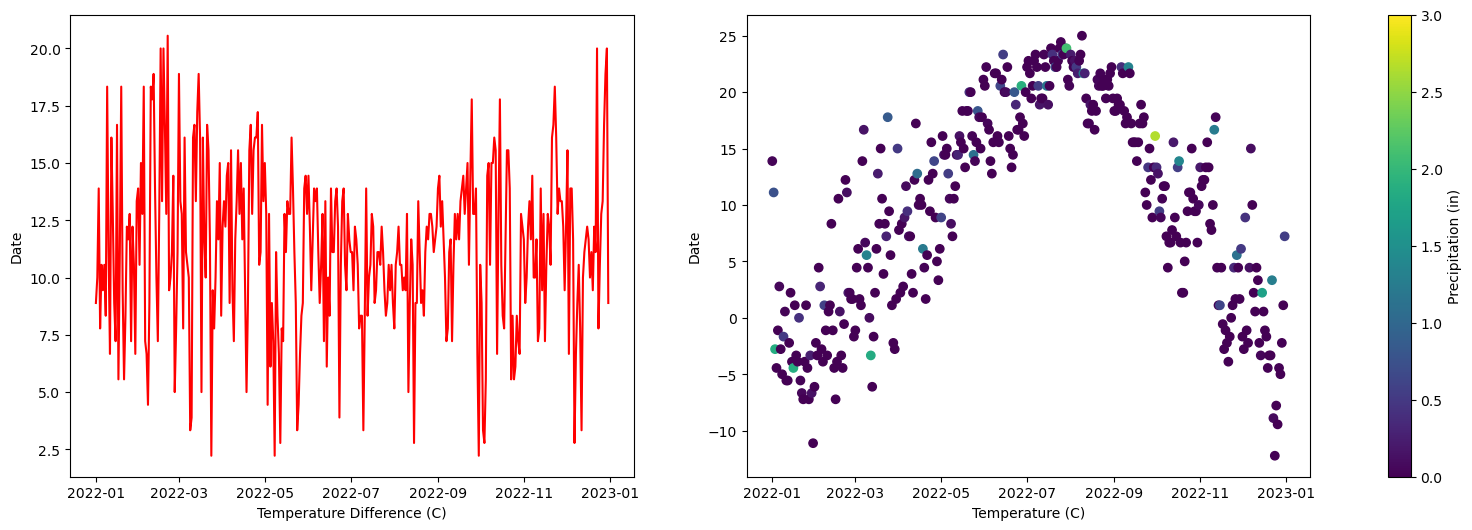

In [29]:
# Create a fig and ax object
fig, ax = plt.subplots(1,2, figsize=(20,6), sharey=False)


# Plot something on the ax object
# zorder tells the program what order to plot objects in
temp_diff= (high_tempc - low_tempc)
ax[0].plot(date, temp_diff, color='red', linestyle='-', zorder=0)

# One way to do it is to name a variable the ax object's plot
# I am also specifying a "vmin" and "vmax" which are the maximum and minimum values for the colorbar
scatterplot = ax[1].scatter(date,low_tempc, c=precip, marker='o', linestyle='-',
                         vmin= 0, 
                          vmax=3,
                            zorder=1)

# Customize the colorbar by specifying the variable name for the axis object
colorbar = plt.colorbar(scatterplot, ax=ax)
colorbar.set_label('Precipitation (in)')  # Set the label for the colorbar

ax[0].set_ylabel('Date')
ax[1].set_ylabel('Date')

ax[0].set_xlabel('Temperature Difference (C)')
ax[1].set_xlabel('Temperature (C)')


# Recall "publication-worthy" plots!

 - Your plots must have x and y axes <b>[labeled](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)</b> with proper <b>units</b>
 - Any additional colors, symbols, etc. plotted must be explained in a <b>[legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)</b> (or, if it is challenging to code the legend for some reason, please add it as a caption in Markdown text)
 - Plots should have an intuitive <b>[title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)</b>
 - Plots should have text that is readable, ensuring that <b>[font size](https://matplotlib.org/stable/users/explain/text/text_props.html)</b> is appropriate and any line breaks are added with the `/n` new line character

# For the capstone

If you are likely to encounter tabular data in your scientific adventures, you are also likely to want to visualize those data. Pandas has many [built-in functions](https://pandas.pydata.org/docs/user_guide/visualization.html) to make plotting your DataFrames easy. In particular, an advantage `pandas` has over Excel is that it is <i>exceptionally</i> easy to add colors to your points based on values from a third column, resulting in compact, data-rich visualizations. There is another package, [`seaborn`](https://seaborn.pydata.org/), which we will encounter later that adds additional functionality and visualization methods to your DataFrames. In short, building and visualizing DataFrames is often the foundation of a geoscientific analysis!